In [1]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# use pandas to load data into a DataFrame
df = pd.read_csv("water_potability.csv")
df.shape # (rows, columns)

(3276, 10)

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Potability is the target variable, how many of each class are there?
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

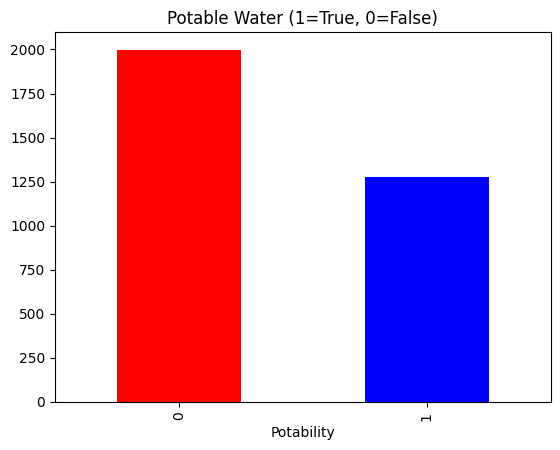

In [5]:
df["Potability"].value_counts().plot(kind="bar", color=["red", "blue"], title = "Potable Water (1=True, 0=False)");

In [6]:
(1998/(1998+1278))*100 # jumlah persenan imbalance

60.98901098901099

In [7]:
1998-1278 # jumlah data imbalance

720

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.isna().sum() # dari sini juga terlihat

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
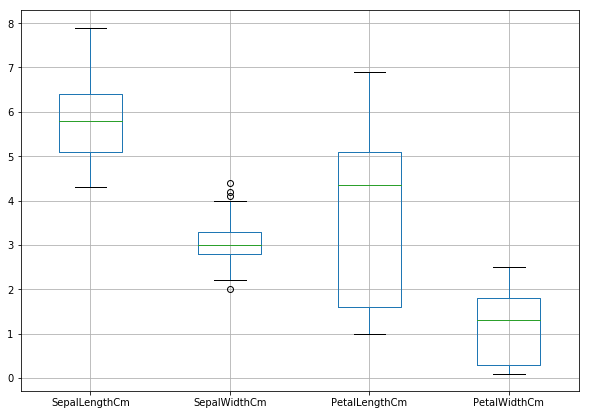

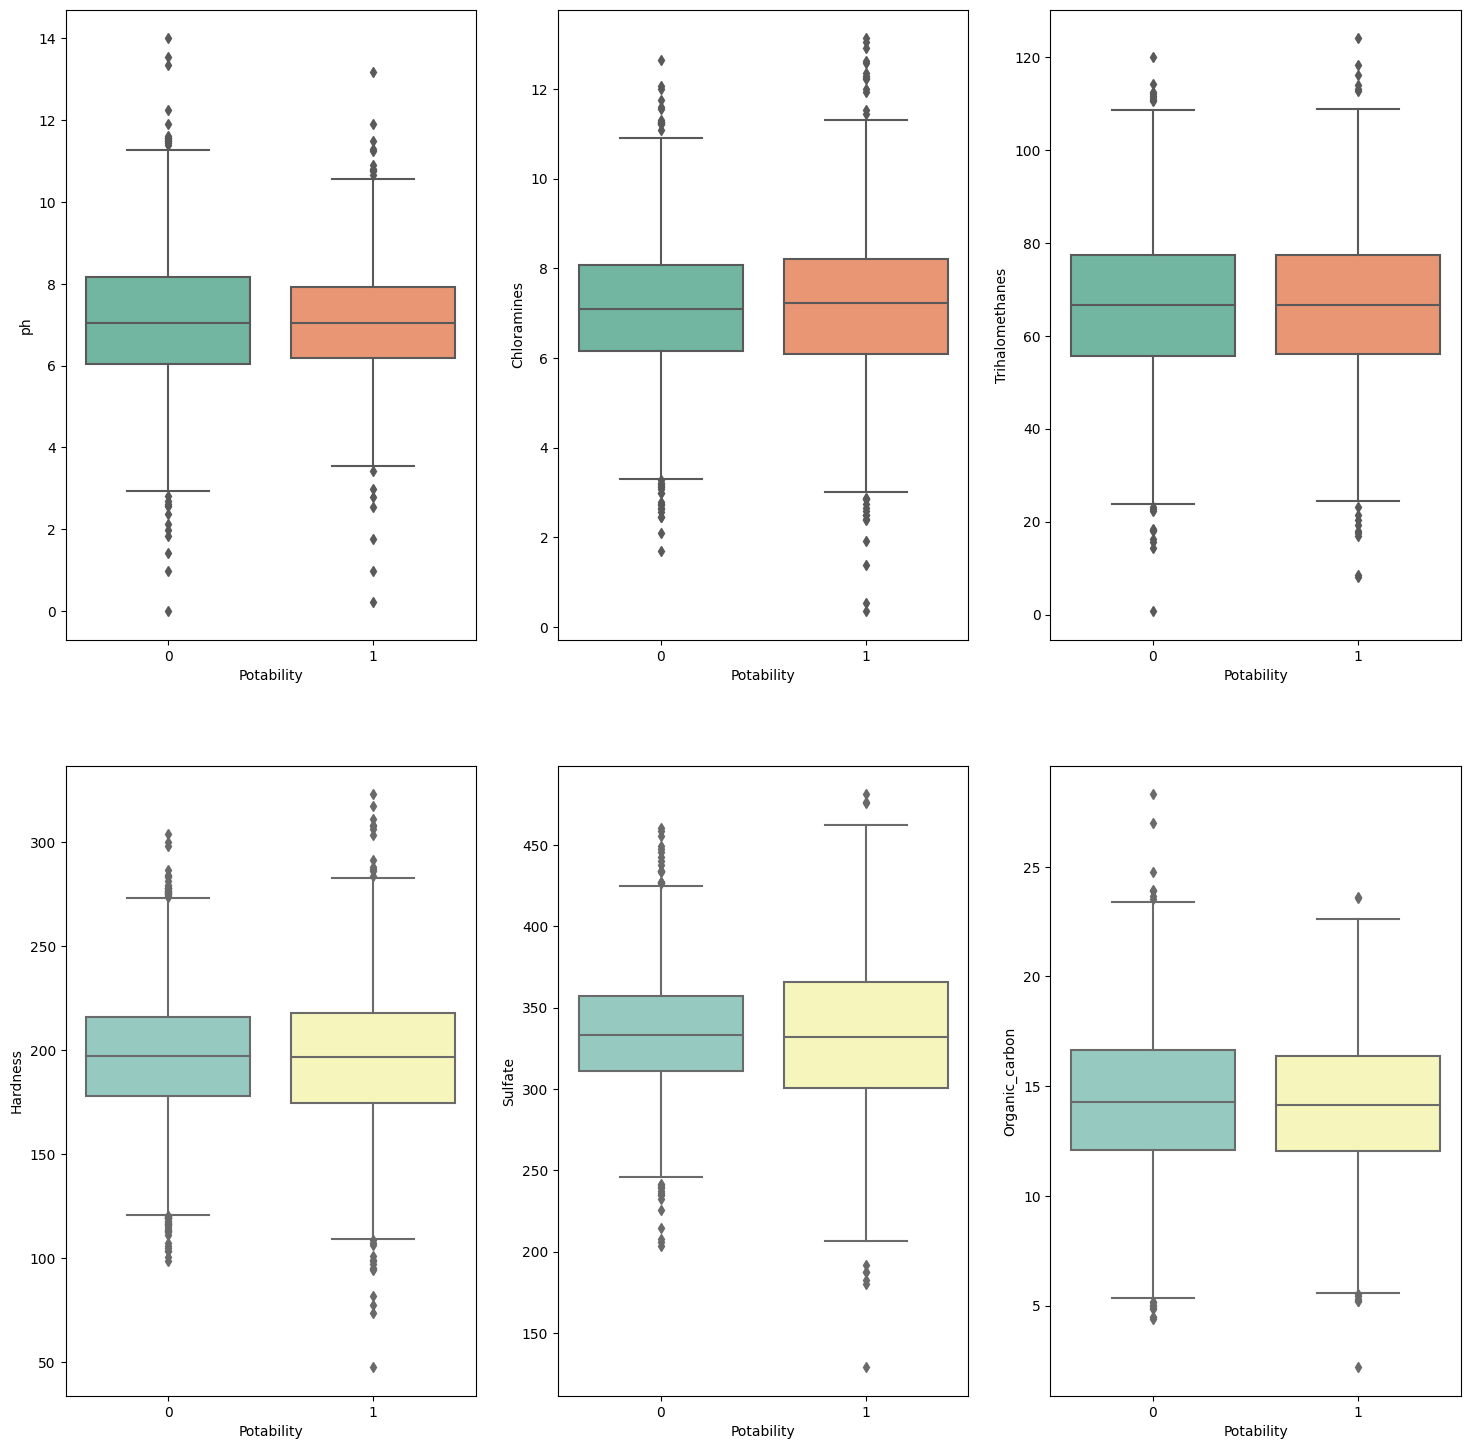

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 18))
sns.boxplot(ax=axes[0,0], data=df, palette="Set2", x='Potability', y='ph')
sns.boxplot(ax=axes[0,1], data=df, palette="Set2", x='Potability', y='Chloramines')
sns.boxplot(ax=axes[0,2], data=df, palette="Set2", x='Potability', y='Trihalomethanes')
sns.boxplot(ax=axes[1,0], data=df, palette="Set3", x='Potability', y='Hardness')
sns.boxplot(ax=axes[1,1], data=df, palette="Set3", x='Potability', y='Sulfate')
sns.boxplot(ax=axes[1,2], data=df, palette="Set3", x='Potability', y='Organic_carbon');

### Distribusi data setiap fitur dengan histograms

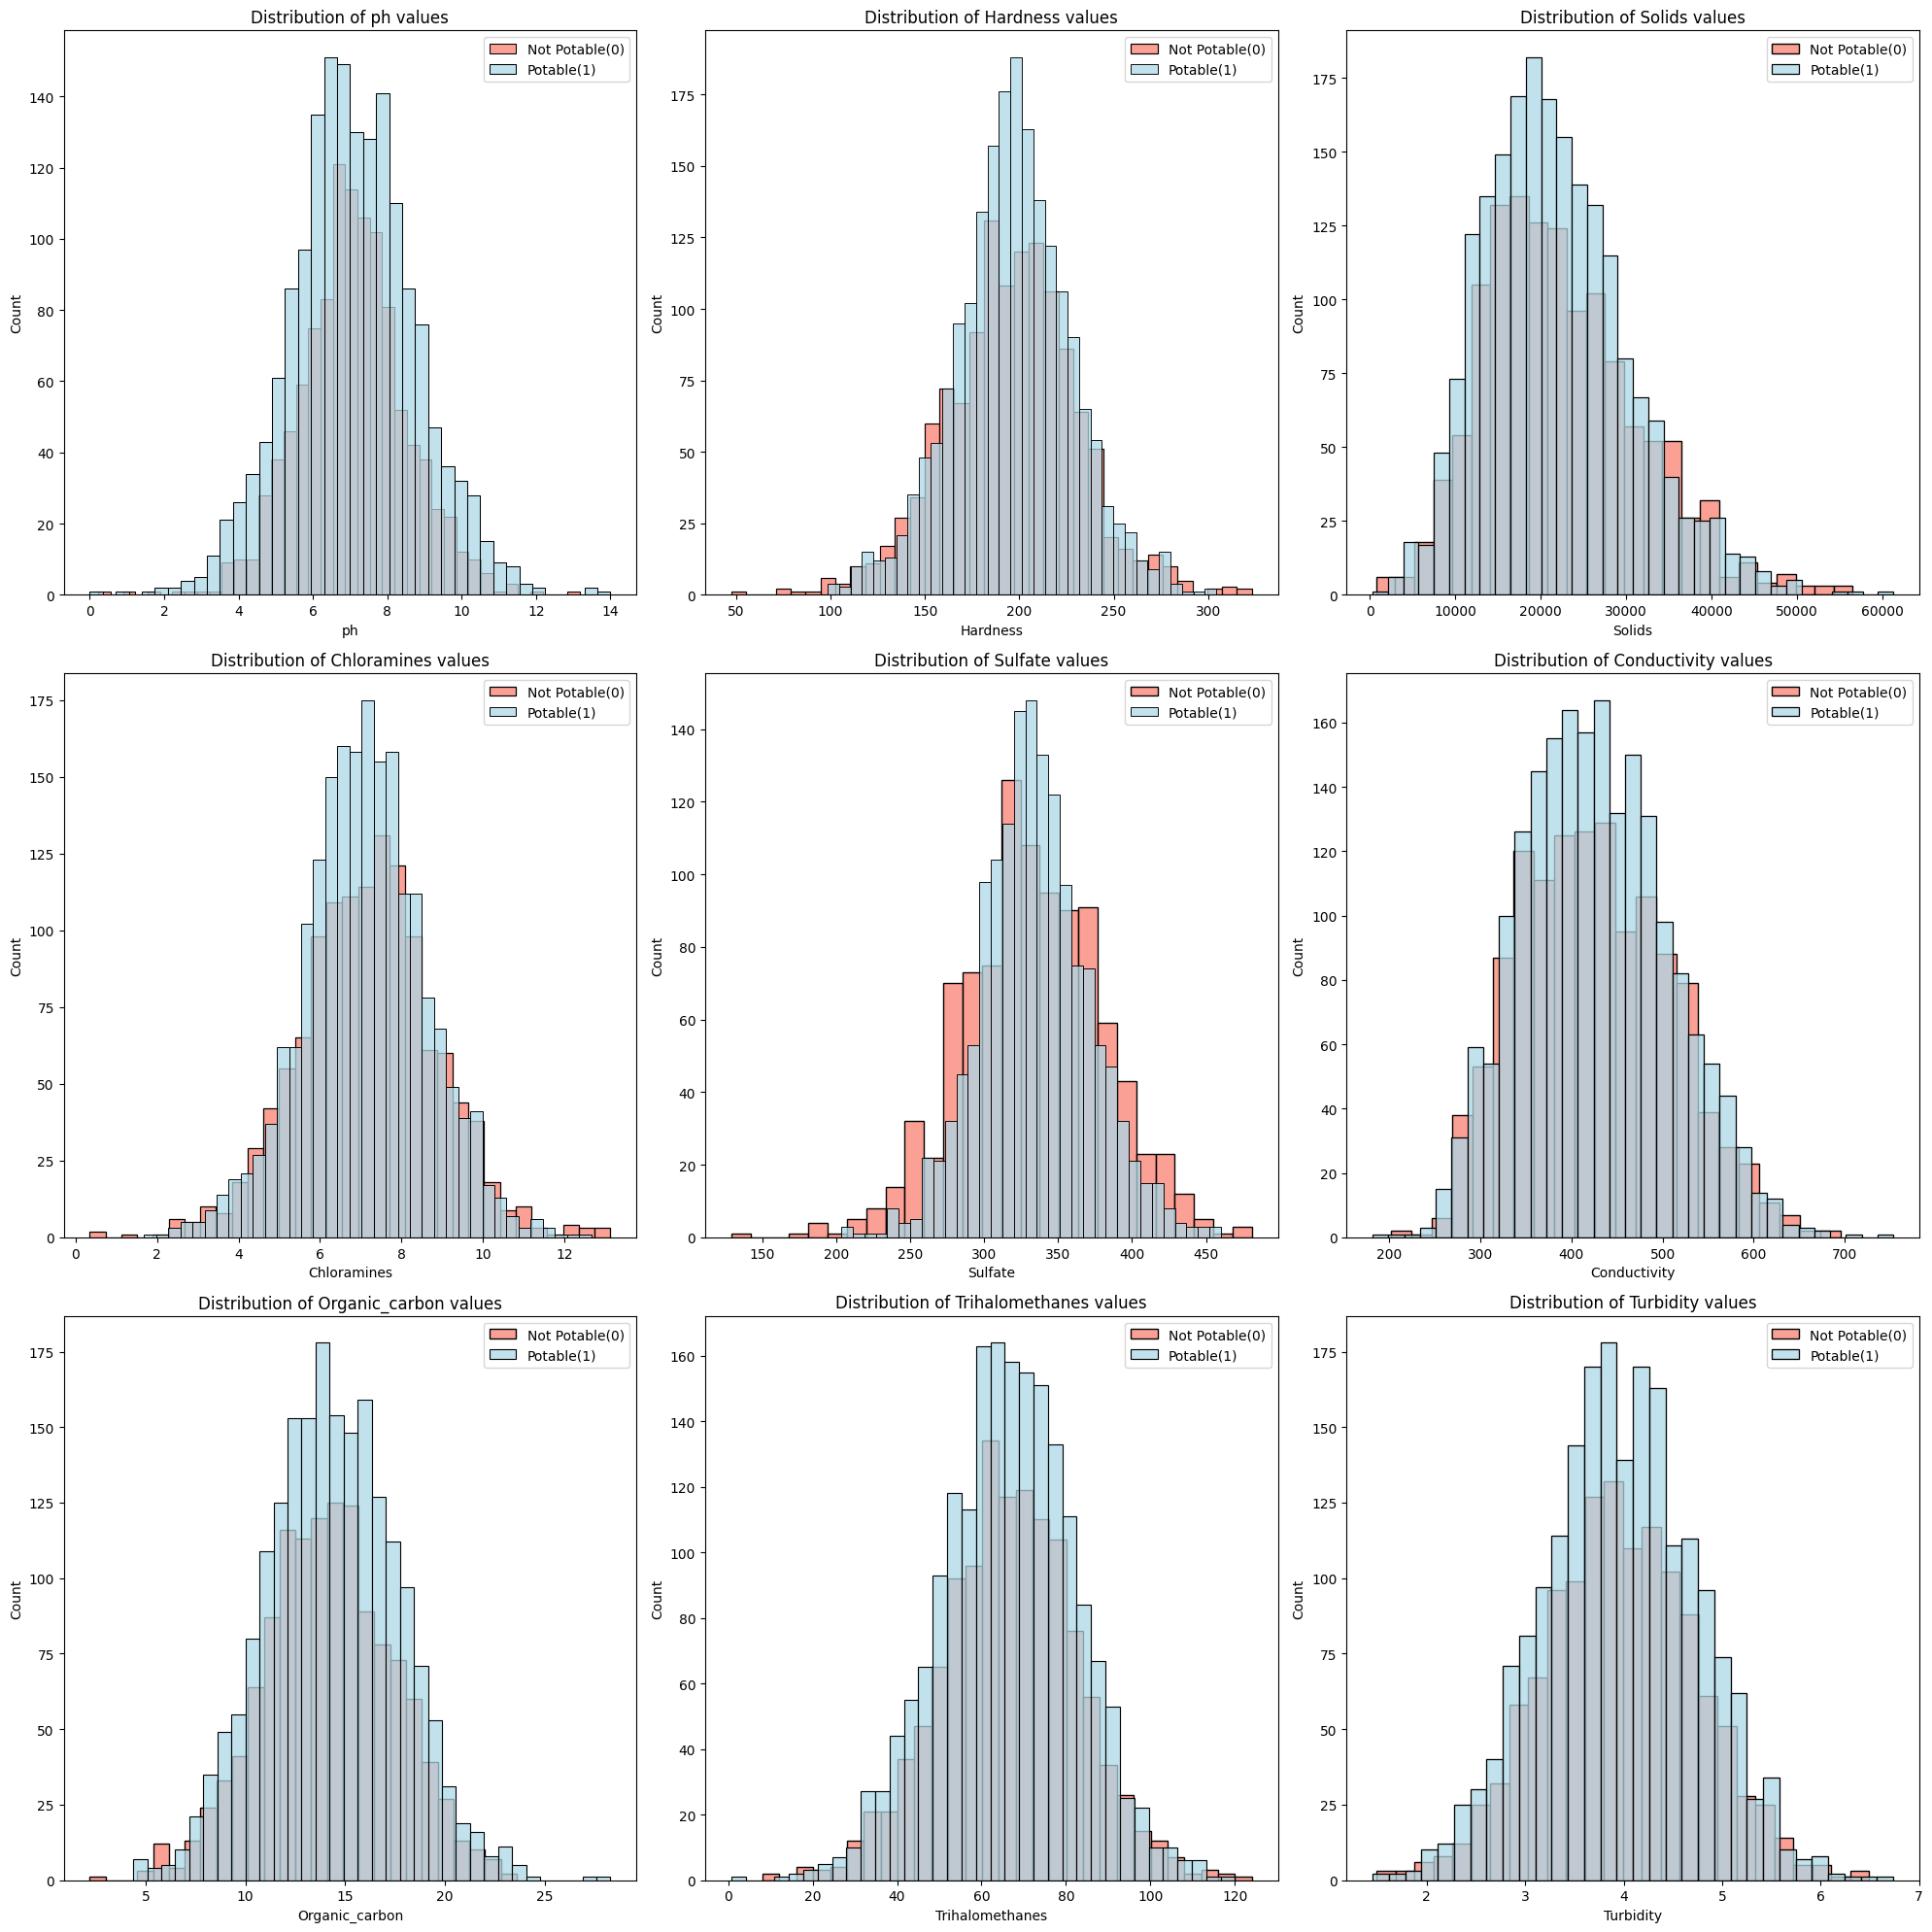

In [12]:
# Distribution of features
potable = df.query('Potability == 0')
not_potable = df.query('Potability == 1')

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.histplot(x=not_potable[column],label='Not Potable(0)', color="salmon")
    sns.histplot(x=potable[column],label='Potable(1)', color="lightblue")
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

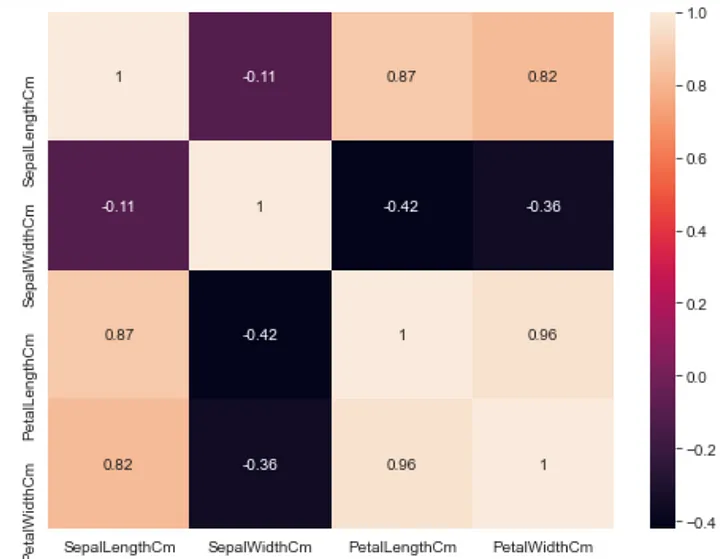

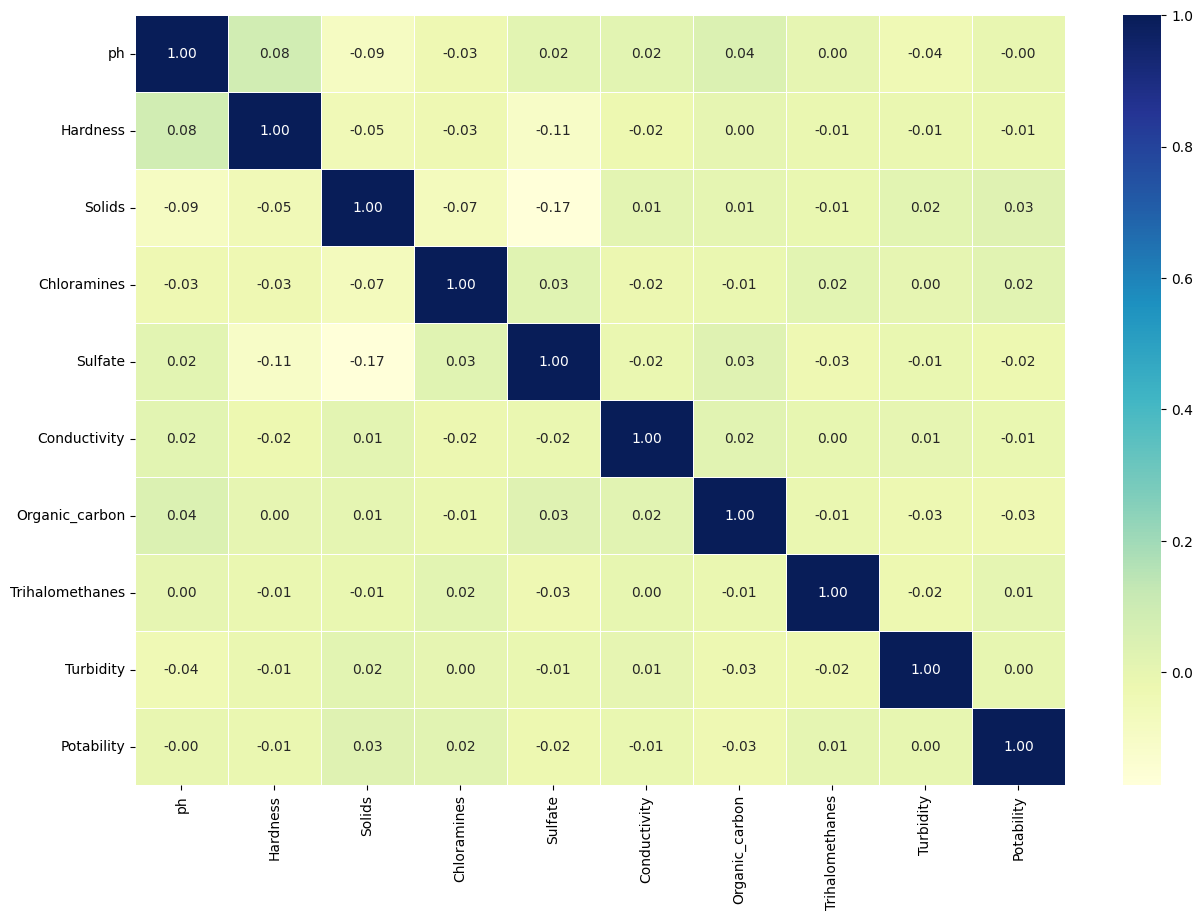

In [14]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Scatter Plot

Melihat pesebaran data dengan x_axis=Sulfate dan y_axis=Solids, karena meliaht korelasi dari data tersebut

<Axes: xlabel='Sulfate', ylabel='Solids'>

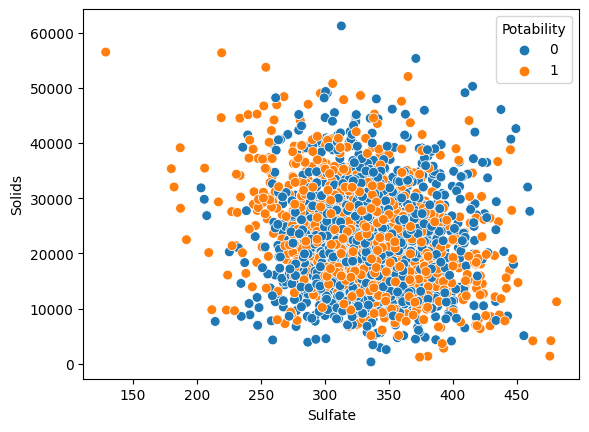

In [21]:
sns.scatterplot(x=df['Sulfate'], y=df['Solids'], hue=df['Potability'], s=50)